In [ ]:
!pip install yfinance
!pip install scikit-learn

In [ ]:

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
stock = "TCS.NS"
df = yf.download(stock, start="2015-09-02", end="2025-09-01")
df = df[['Close']]
df.dropna(inplace=True)
df.head()


/tmp/ipython-input-1129439823.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start="2015-09-02", end="2025-09-01")
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,TCS.NS
Date,
2015-09-02,1107.759399
2015-09-03,1113.657837
2015-09-04,1088.803833
2015-09-07,1085.512573
2015-09-08,1085.747803


In [ ]:
df

Price,Close
Ticker,TCS.NS
Date,
2015-09-02,1107.759399
2015-09-03,1113.657837
2015-09-04,1088.803833
2015-09-07,1085.512573
2015-09-08,1085.747803
...,...
2025-08-25,3140.600098
2025-08-26,3157.199951


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

train_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_data_len]
test_data = scaled_data[train_data_len - 60:]

# Create sequences
def create_sequences(data, seq_len=60):
    x, y = [], []
    for i in range(seq_len, len(data)):
        x.append(data[i - seq_len:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

x_train, y_train = create_sequences(train_data)
x_test, y_test = create_sequences(test_data)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.1)


Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 164ms/step - loss: 0.0401 - val_loss: 0.0015
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0024 - val_loss: 7.4186e-04
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0022 - val_loss: 6.5547e-04
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0020 - val_loss: 5.4577e-04
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0015 - val_loss: 7.8637e-04
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0018 - val_loss: 6.1162e-04
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0016 - val_loss: 9.2850e-04
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0016 - val_loss: 5.8922e-04
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0014 - val_loss: 4.0148e-04
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0013 - val_loss: 4.8971e-04


In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Reverse y_test
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


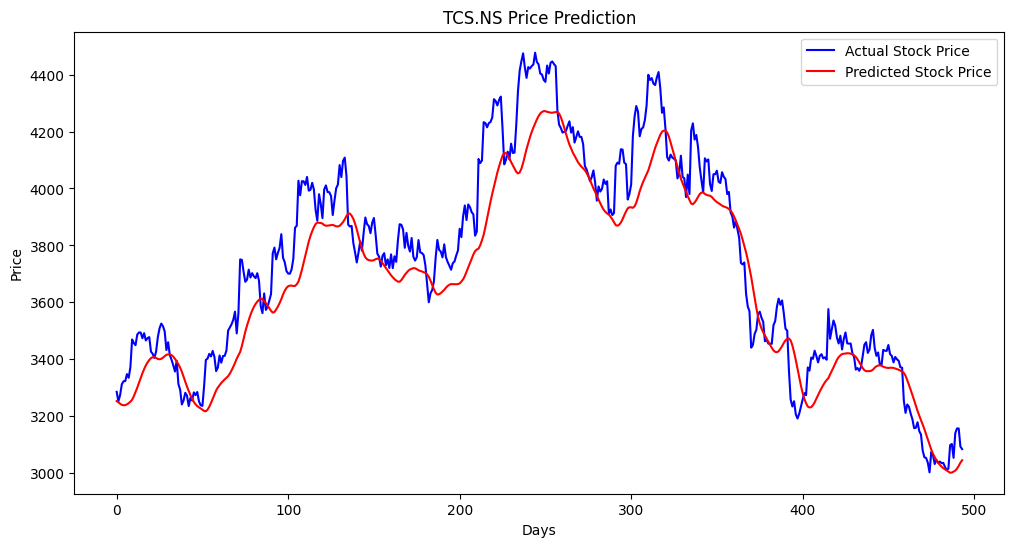

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test_unscaled, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title(f"{stock} Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_unscaled, predictions))
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 137.23948058812041


In [ ]:
last_60_days = scaled_data[-60:]
X_input = last_60_days.reshape(1, 60, 1)
next_day_pred = model.predict(X_input)
predicted_price = scaler.inverse_transform(next_day_pred)
print("Next Day Predicted Closing Price:", predicted_price[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Next Day Predicted Closing Price: 3051.7754
